In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
!pip install beautifulsoup4
from bs4 import BeautifulSoup
!pip install geocoder
import geocoder
import os
!pip install folium
import folium # map rendering library
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

     |████████████████████████████████| 122kB 5.7MB/s eta 0:00:01
     |████████████████████████████████| 102kB 4.9MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
     |████████████████████████████████| 829kB 9.6MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    -----------------------------------------------------

In [58]:
Geospatial_Coordinates = pd.read_csv('suresh_us-zip-code-latitude-and-longitude.csv') 
Geospatial_Coordinates.columns=["Zip","City","State","Latitude","Longitude"]
Geospatial_Coordinates['Zip']=Geospatial_Coordinates['Zip'].apply(lambda x: '{0:0>5}'.format(x))

In [84]:
Geospatial_Coordinates.head()

,Zip,City,State,Latitude,Longitude
0,02351,Abington,MA,42.119534,-70.947870
1,02018,Accord,MA,41.970474,-70.701357
2,01720,Acton,MA,42.477142,-71.442200
3,02743,Acushnet,MA,41.697015,-70.910190
4,01220,Adams,MA,42.619727,-73.118420


In [5]:
CLIENT_ID = '2MIFB4R2SAQ1PGBOXWVU2WIGD0EWX0ZZ14YE3ECV5V0QJICN' 
CLIENT_SECRET = '3WC5WS5TSTEIZ3D4SHVDKCJ14IKBXIJSGOCGIGCRVNYFDKAI' 
VERSION = '20190720'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2MIFB4R2SAQ1PGBOXWVU2WIGD0EWX0ZZ14YE3ECV5V0QJICN
CLIENT_SECRET:3WC5WS5TSTEIZ3D4SHVDKCJ14IKBXIJSGOCGIGCRVNYFDKAI


In [85]:
def get_venues(Zip, City, lat,lng):
    
    #set variables
    radius=5000
    LIMIT=1000
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([Zip, City, venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['Zip', 'City','ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [86]:
import re

recreation_count=0
fitness_count=0
hospital_count=0
eateries_count=0
groceries_count=0
column_names=['Zip','Neighborhood', 'recreation_count','fitness_count','hospital_count','eateries_count','groceries_count']
venue_details=pd.DataFrame(columns=column_names)



for row in Geospatial_Coordinates.values.tolist():
    Zip, City, State, Latitude, Longitude=row
    venues = get_venues(Zip, City, Latitude, Longitude)
    #venue_with_trails=venues[venues['Category']=='Trail']  
    recreation_count = str(np.sum(venues['Category'].str.contains('Trail|River|Beach|Waterfront|Park',flags=re.IGNORECASE, regex=True)))
    fitness_count = str(np.sum(venues['Category'].str.contains('Gym|Fitness',flags=re.IGNORECASE, regex=True)))
    hospital_count = str(np.sum(venues['Category'].str.contains('Hospital',flags=re.IGNORECASE, regex=False)))
    eateries_count = str(np.sum(venues['Category'].str.contains('Restaurant|Bakery',flags=re.IGNORECASE, regex=True)))
    groceries_count = str(np.sum(venues['Category'].str.contains('Supermarket',flags=re.IGNORECASE, regex=False)))
    venue_details = venue_details.append({
                                                'Zip':Zip,
                                                'Neighborhood': City, 
                                                'recreation_count': recreation_count,
                                                'fitness_count' : fitness_count,
                                                'hospital_count' : hospital_count,
                                                'eateries_count' : eateries_count,
                                                'groceries_count' : groceries_count
                                               }, ignore_index=True)      

venue_details    

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count
0,02351,Abington,2,3,0,16,1
1,02018,Accord,6,1,0,22,0
2,01720,Acton,2,5,0,22,2
3,02743,Acushnet,1,0,0,13,1
4,01220,Adams,2,0,0,4,1
5,01001,Agawam,13,4,0,19,0
6,02134,Allston,4,1,0,32,0
7,01913,Amesbury,2,3,0,16,2
8,01002,Amherst,1,0,0,25,1
9,01004,Amherst,1,0,0,25,1


In [87]:
venue_details = pd.merge(left=venue_details, right=Geospatial_Coordinates, left_on='Zip', right_on='Zip')

In [88]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,City,State,Latitude,Longitude
0,02351,Abington,2,3,0,16,1,Abington,MA,42.119534,-70.947870
1,02018,Accord,6,1,0,22,0,Accord,MA,41.970474,-70.701357
2,01720,Acton,2,5,0,22,2,Acton,MA,42.477142,-71.442200
3,02743,Acushnet,1,0,0,13,1,Acushnet,MA,41.697015,-70.910190
4,01220,Adams,2,0,0,4,1,Adams,MA,42.619727,-73.118420


In [89]:
venue_details=venue_details.drop(['City', 'State'], axis=1)

In [90]:
home_sales = pd.read_csv('Redfin_Zipcode_HomeSales_Full_Data_Download.csv') 
home_sales.columns=["Region","Homes Sold","Inventory","Median Sale Price","New Listings"]
home_sales['Region']=home_sales['Region'].apply(lambda x: '{0:0>5}'.format(x))

In [91]:
home_sales.head()

,Region,Homes Sold,Inventory,Median Sale Price,New Listings
0,02189,43,25.0,385000,53.0
1,01880,55,31.0,574000,87.0
2,02061,30,43.0,690000,53.0
3,02667,15,39.0,571000,31.0
4,01907,38,34.0,521000,57.0


In [5]:
home_sales_revised = pd.read_csv('full_Redfin_Zipcode_HomeSales_Full_Data_Download.csv') 
home_sales_revised.columns=["Region","Period","Median Sale Price"]
home_sales_revised['Region']=home_sales_revised['Region'].apply(lambda x: '{0:0>5}'.format(x))

In [6]:
home_sales_revised.head()


,Region,Period,Median Sale Price
0,01834,Jan-12,250000
1,02481,Jan-12,925000
2,02743,Jan-12,188000
3,01746,Feb-12,285000
4,01506,Mar-12,120000


In [7]:
home_sales_revised.shape

(39075, 3)

In [8]:
grouped_home_sales = home_sales_revised.groupby(['Region']).agg({'Period': ['max']})


In [9]:
grouped_home_sales.head()


,Period
,max
Region,
01005,Sep-19
01010,Sep-17
01031,Sep-19
01037,Sep-19
01068,Sep-19


In [10]:
grouped_home_sales.shape

(416, 1)

In [11]:
grouped_home_sales.columns = ['period_max']

In [12]:
grouped_home_sales = grouped_home_sales.reset_index()

In [13]:
grouped_home_sales.head()

,Region,period_max
0,01005,Sep-19
1,01010,Sep-17
2,01031,Sep-19
3,01037,Sep-19
4,01068,Sep-19


In [14]:
home_sales_revised = pd.merge(left=home_sales_revised, right=grouped_home_sales, left_on=['Region','Period'], right_on=['Region','period_max'])

In [15]:
home_sales_revised.head()


,Region,Period,Median Sale Price,period_max
0,02659,Sep-19,370000,Sep-19
1,02093,Sep-19,490000,Sep-19
2,01863,Sep-19,365000,Sep-19
3,01803,Sep-19,630000,Sep-19
4,02019,Sep-19,325000,Sep-19


In [16]:
home_sales_revised.shape

(416, 4)

In [17]:
home_sales_revised = home_sales_revised.drop(['Period', 'period_max'], axis=1)

In [18]:
home_sales_revised.head()

,Region,Median Sale Price
0,02659,370000
1,02093,490000
2,01863,365000
3,01803,630000
4,02019,325000


In [92]:
venue_details.to_csv('city_attr_lat_long.csv')

In [3]:
venue_details = pd.read_csv('city_attr_lat_long.csv') 
venue_details.columns=["Zip","Neighborhood","recreation_count","fitness_count","hospital_count","eateries_count","groceries_count","Latitude","Longitude"]
venue_details['Zip']=venue_details['Zip'].apply(lambda x: '{0:0>5}'.format(x))

In [19]:
venue_details = pd.merge(left=venue_details, right=home_sales_revised, left_on='Zip', right_on='Region')

In [20]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Region,Median Sale Price
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,02351,360000
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,01720,604000
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,02743,306000
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,02134,560000
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,01913,375000


In [21]:
venue_details=venue_details.drop(['Region'], axis=1)

In [23]:
venue_details.head()
venue_details.shape

(415, 10)

In [25]:
venue_details.to_csv('415_city_attr_lat_long_median_price.csv',index=False)

In [50]:
venue_details = pd.read_csv('415_city_attr_lat_long_median_price.csv') 
#venue_details.columns=["Region","Homes Sold","Inventory","Median Sale Price","New Listings"]
venue_details['Zip']=venue_details['Zip'].apply(lambda x: '{0:0>5}'.format(x))

In [27]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000


In [51]:
venue_details.shape

(415, 10)

In [29]:
ma_walk_transit = pd.read_csv('MA_City_Walk_Transit_Score.csv') 
#venue_details.columns=["Region","Homes Sold","Inventory","Median Sale Price","New Listings"]
ma_walk_transit['Zip Code']=ma_walk_transit['Zip Code'].apply(lambda x: '{0:0>5}'.format(x))

In [31]:
ma_walk_transit.head()

,City,Zip Code,Walk Score,Transit Score,Bike Score,Population,Unnamed: 6
0,Somerville,02145,89,64,89,"75,754",NaN
1,Cambridge,02138,88,74,96,"105,162",NaN
2,Everett,02149,83,49,52,"41,667",NaN
3,Boston,02124,82,72,70,"617,594",NaN
4,Chelsea,02150,81,57,47,"35,177",NaN


In [32]:
ma_walk_transit=ma_walk_transit.drop(['Unnamed: 6'], axis=1)

In [33]:
ma_walk_transit.head()

,City,Zip Code,Walk Score,Transit Score,Bike Score,Population
0,Somerville,02145,89,64,89,"75,754"
1,Cambridge,02138,88,74,96,"105,162"
2,Everett,02149,83,49,52,"41,667"
3,Boston,02124,82,72,70,"617,594"
4,Chelsea,02150,81,57,47,"35,177"


In [34]:
ma_walk_transit.dtypes

City             object
Zip Code         object
Walk Score        int64
Transit Score     int64
Bike Score        int64
Population       object
dtype: object

In [35]:
ma_walk_transit['Population']=ma_walk_transit['Population'].apply(lambda x: str(x.replace(',','')))
ma_walk_transit['Population']=ma_walk_transit['Population'].astype(str).astype(float)

In [36]:
ma_walk_transit.dtypes

City              object
Zip Code          object
Walk Score         int64
Transit Score      int64
Bike Score         int64
Population       float64
dtype: object

In [52]:
print(venue_details.dtypes)

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
hospital_count         int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price     object
dtype: object


In [45]:
%%capture
! pip install seaborn
import seaborn as sns

In [53]:
venue_details['Median Sale Price']=venue_details['Median Sale Price'].apply(lambda x: str(x.replace(',','')))

In [54]:
venue_details['recreation_count']=venue_details['recreation_count'].astype(str).astype(int)
venue_details['fitness_count']=venue_details['fitness_count'].astype(str).astype(int)
venue_details['hospital_count']=venue_details['hospital_count'].astype(str).astype(int)
venue_details['eateries_count']=venue_details['eateries_count'].astype(str).astype(int)
venue_details['groceries_count']=venue_details['groceries_count'].astype(str).astype(int)
venue_details['Median Sale Price']=venue_details['Median Sale Price'].astype(str).astype(float)

In [55]:
venue_details
print(venue_details.dtypes)

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
hospital_count         int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price    float64
dtype: object


In [56]:
venue_details.head()
venue_details.shape

(415, 10)

In [57]:
venue_details = pd.merge(left=venue_details, right=ma_walk_transit, left_on='Zip', right_on='Zip Code', how ='left')

In [58]:
venue_details.shape

(415, 16)

In [59]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,City,Zip Code,Walk Score,Transit Score,Bike Score,Population
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,City,Zip Code,Walk Score,Transit Score,Bike Score,Population
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000.0,0,0,0.0,0.0,0.0,0.0
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000.0,0,0,0.0,0.0,0.0,0.0
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000.0,0,0,0.0,0.0,0.0,0.0
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000.0,0,0,0.0,0.0,0.0,0.0
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000.0,0,0,0.0,0.0,0.0,0.0


In [70]:
venue_details.dtypes

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
hospital_count         int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price    float64
City                  object
Zip Code              object
Walk Score           float64
Transit Score        float64
Bike Score           float64
Population           float64
dtype: object

In [72]:
venue_details
venue_details=venue_details.drop(['City','Zip Code'], axis=1)

In [73]:
venue_details.dtypes

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
hospital_count         int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price    float64
Walk Score           float64
Transit Score        float64
Bike Score           float64
Population           float64
dtype: object

In [65]:
venue_details=venue_details.replace(np.NaN,0)
venue_details['Walk Score'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Walk Score, dtype: float64

In [74]:
venue_details.to_csv('transit_415_city_attr_lat_long_median_price.csv',index=False)

In [16]:
venue_details = pd.read_csv('transit_415_city_attr_lat_long_median_price.csv') 
#venue_details.columns=["Region","Homes Sold","Inventory","Median Sale Price","New Listings"]
venue_details['Zip']=venue_details['Zip'].apply(lambda x: '{0:0>5}'.format(x))

In [17]:
venue_details.shape

(415, 14)

In [18]:
venue_details.dtypes

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
hospital_count         int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price    float64
Walk Score           float64
Transit Score        float64
Bike Score           float64
Population           float64
dtype: object

In [6]:
crimes = pd.read_csv('Mass_Total_Known_Offenses_City_2018.csv')
crimes.head()

,City,Total Violent Crimes,Total Property Crimes
0,Abington,41,147
1,Acton,26,156
2,Acushnet,19,69
3,Adams,23,96
4,Agawam,105,428


In [10]:
crimes.dtypes

City                      object
Total Violent Crimes     float64
Total Property Crimes    float64
dtype: object

In [9]:
crimes['Total Violent Crimes']=crimes['Total Violent Crimes'].astype(str)
crimes['Total Violent Crimes']=crimes['Total Violent Crimes'].apply(lambda x: str(x.replace(',','')))
crimes['Total Violent Crimes']=crimes['Total Violent Crimes'].astype(str).astype(float)

crimes['Total Property Crimes']=crimes['Total Property Crimes'].astype(str)
crimes['Total Property Crimes']=crimes['Total Property Crimes'].apply(lambda x: str(x.replace(',','')))
crimes['Total Property Crimes']=crimes['Total Property Crimes'].astype(str).astype(float)

In [11]:
crimes['Total_crimes'] = crimes['Total Violent Crimes'] + crimes['Total Property Crimes']

In [12]:
crimes.head()

,City,Total Violent Crimes,Total Property Crimes,Total_crimes
0,Abington,41.0,147.0,188.0
1,Acton,26.0,156.0,182.0
2,Acushnet,19.0,69.0,88.0
3,Adams,23.0,96.0,119.0
4,Agawam,105.0,428.0,533.0


In [13]:
crimes=crimes.drop(['Total Violent Crimes','Total Property Crimes'], axis=1)

In [14]:
crimes.head()

,City,Total_crimes
0,Abington,188.0
1,Acton,182.0
2,Acushnet,88.0
3,Adams,119.0
4,Agawam,533.0


In [15]:
crimes.shape

(279, 2)

In [87]:
venue_details.shape

(415, 14)

In [19]:
venue_details = pd.merge(left=venue_details, right=crimes, left_on='Neighborhood', right_on='City', how ='left')

In [20]:
venue_details.shape

(415, 16)

In [21]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Population,City,Total_crimes
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000.0,0.0,0.0,0.0,0.0,Abington,188.0
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,0.0,Acton,182.0
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000.0,0.0,0.0,0.0,0.0,Acushnet,88.0
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000.0,0.0,0.0,0.0,0.0,NaN,NaN
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000.0,0.0,0.0,0.0,0.0,Amesbury,175.0


In [22]:
venue_details=venue_details.drop(['City'], axis=1)

In [23]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Population,Total_crimes
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000.0,0.0,0.0,0.0,0.0,188.0
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,0.0,182.0
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000.0,0.0,0.0,0.0,0.0,88.0
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000.0,0.0,0.0,0.0,0.0,NaN
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000.0,0.0,0.0,0.0,0.0,175.0


In [24]:
venue_details.dtypes

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
hospital_count         int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price    float64
Walk Score           float64
Transit Score        float64
Bike Score           float64
Population           float64
Total_crimes         float64
dtype: object

In [108]:
venue_details['Total_crimes']=venue_details['Total_crimes'].astype(str)
venue_details['Total_crimes']=venue_details['Total_crimes'].apply(lambda x: str(x.replace(',','')))


In [109]:
venue_details['Total_crimes']=venue_details['Total_crimes'].astype(str).astype(float)

In [26]:
venue_details.to_csv('crimes_transit_415_city_attr_lat_long_median_price.csv',index=False)

In [3]:
venue_details.shape

(415, 15)

In [25]:
venue_details=venue_details.replace(np.NaN,0)
venue_details['Total_crimes'].head()

0    188.0
1    182.0
2     88.0
3      0.0
4    175.0
Name: Total_crimes, dtype: float64

In [49]:
venue_details = pd.read_csv('crimes_transit_415_city_attr_lat_long_median_price.csv') 
#venue_details.columns=["Region","Homes Sold","Inventory","Median Sale Price","New Listings"]
venue_details['Zip']=venue_details['Zip'].apply(lambda x: '{0:0>5}'.format(x))

In [50]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Population,Total_crimes
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000.0,0.0,0.0,0.0,0.0,188.0
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,0.0,182.0
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000.0,0.0,0.0,0.0,0.0,88.0
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000.0,0.0,0.0,0.0,0.0,0.0
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000.0,0.0,0.0,0.0,0.0,175.0


In [290]:
# Read CSV to DataFrame
msdf = pd.read_csv('MA_Public_Schools_2017.csv') 
# Left Pad 0 to the 4 Digit Zip Codes
msdf['Zip'] = msdf['Zip'].apply(lambda x: '{0:0>5}'.format(x)) 
# Rename Columns
msdf.rename(columns={'Progress and Performance Index (PPI) - All Students': 'School PPI', 
                     'District_Progress and Performance Index (PPI) - All Students': 'District PPI'}, inplace=True)
msdf = msdf.replace(np.NaN,0)


In [291]:
msdf.head()
cmsdf = msdf[['School PPI','District PPI']]
cmsdf.head()

,School PPI,District PPI
0,76.0,63.0
1,69.0,63.0
2,0.0,63.0
3,63.0,63.0
4,65.0,63.0


In [292]:
cmsdf.describe()

,School PPI,District PPI
count,1861.000000,1861.000000
mean,61.796346,63.691026
std,29.518973,16.612719
min,0.000000,0.000000
25%,54.000000,54.000000
50%,68.000000,62.000000
75%,81.000000,71.000000
max,100.000000,100.000000


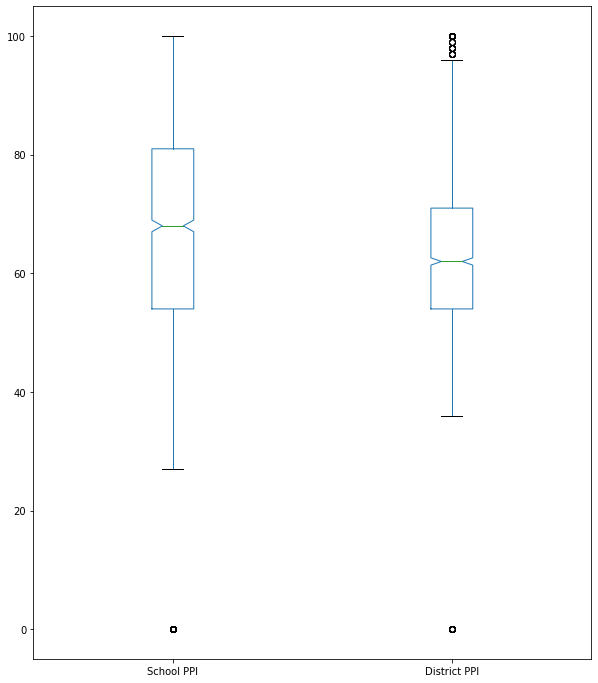

The Median School PPI is : 68.0 . We can derive that any neighborhood with School PPI > 71% is good for families with children


In [293]:
# Box Plot 
cmsdf.plot(kind='box', figsize=(10, 12), notch=True)
plt.show()
print("The Median School PPI is :", cmsdf['School PPI'].median(), '. We can derive that any neighborhood with School PPI > 71% is good for families with children')

In [294]:
# Take only relevant columns
msdf = msdf[['Zip','School PPI','District PPI']]
# Top School Count - If School PPI is Greater Than School District PPI and also, the School PPI is Greater than Median School PPI value of (71%)
msdf['TopSchoolCount'] = np.where(msdf['School PPI'] > 71.0, 1, 0)
#msdf['TopSchoolCount'] = np.where((msdf['School PPI'] > msdf['District PPI']) & (msdf['School PPI'] > msdf['School PPI'].median()), 1, 0)
print(msdf.dtypes)
msdf.head()

Zip                object
School PPI        float64
District PPI      float64
TopSchoolCount      int64
dtype: object


,Zip,School PPI,District PPI,TopSchoolCount
0,02351,76.0,63.0,1
1,02351,69.0,63.0,0
2,02351,0.0,63.0,0
3,02351,63.0,63.0,0
4,02351,65.0,63.0,0


In [295]:
#msdf.drop(msdf.columns[[2, 3]], axis = 1, inplace = True) 
#msdf.head()
# Get Number of Top Schools within a Zip Code  
msdf = msdf.groupby(['Zip'])['TopSchoolCount'].sum().reset_index()
msdf.head()

,Zip,TopSchoolCount
0,01001,0
1,01002,1
2,01005,0
3,01007,1
4,01010,1


In [296]:
# Write DataFrame to CSV 
msdf.to_csv('Upd_MA_Public_Schools_2017.csv', index=False)

In [51]:
school = pd.read_csv('Upd_MA_Public_Schools_2017.csv') 
#venue_details.columns=["Region","Homes Sold","Inventory","Median Sale Price","New Listings"]
school['Zip']=school['Zip'].apply(lambda x: '{0:0>5}'.format(x))

In [52]:
school.head()

,Zip,TopSchoolCount
0,01001,0
1,01002,1
2,01005,0
3,01007,1
4,01010,1


In [53]:
venue_details.shape

(415, 15)

In [54]:
venue_details = pd.merge(left=venue_details, right=school, left_on='Zip', right_on='Zip', how ='left')

In [55]:
venue_details.head()

,Zip,Neighborhood,recreation_count,fitness_count,hospital_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Population,Total_crimes,TopSchoolCount
0,02351,Abington,2,3,0,16,1,42.119534,-70.94787,360000.0,0.0,0.0,0.0,0.0,188.0,1.0
1,01720,Acton,2,5,0,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,0.0,182.0,6.0
2,02743,Acushnet,1,0,0,13,1,41.697015,-70.91019,306000.0,0.0,0.0,0.0,0.0,88.0,1.0
3,02134,Allston,4,1,0,32,0,42.355147,-71.13164,560000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01913,Amesbury,2,3,0,16,2,42.854423,-70.93547,375000.0,0.0,0.0,0.0,0.0,175.0,0.0


In [56]:
venue_details=venue_details.replace(np.NaN,0)

In [57]:
venue_details=venue_details.drop(['Population','hospital_count'], axis=1)

In [58]:
venue_details.shape

(415, 14)

In [168]:
venue_details['Total_crimes']=-1 * venue_details['Total_crimes']

In [59]:
venue_details.to_csv('schools_crimes_transit_city_attr_lat_long_median_price.csv',index=False)

In [169]:
venue_details.corr()

,recreation_count,fitness_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Total_crimes,TopSchoolCount,Clus_km
recreation_count,1.000000,0.090716,0.380197,-0.108236,-0.098852,0.537474,0.318862,0.093013,0.119780,0.069122,-0.194718,0.049518,-0.193710
fitness_count,0.090716,1.000000,0.576378,0.134262,0.263200,0.000356,0.239613,0.265656,0.258772,0.272963,-0.241690,0.289822,-0.157742
eateries_count,0.380197,0.576378,1.000000,0.152317,0.125538,0.196289,0.233465,0.333394,0.304205,0.325789,-0.353826,0.327294,-0.079466
groceries_count,-0.108236,0.134262,0.152317,1.000000,0.088881,0.000966,-0.148630,0.150775,0.117516,0.137926,0.127797,0.147417,0.093210
Latitude,-0.098852,0.263200,0.125538,0.088881,1.000000,-0.468261,0.022505,0.177948,0.134030,0.163914,-0.103056,0.223001,-0.025650
Longitude,0.537474,0.000356,0.196289,0.000966,-0.468261,1.000000,0.234077,0.015013,0.032024,0.018465,-0.030226,-0.020626,-0.334757
Median Sale Price,0.318862,0.239613,0.233465,-0.148630,0.022505,0.234077,1.000000,0.032230,0.048884,0.052284,-0.245400,0.123493,-0.301951
Walk Score,0.093013,0.265656,0.333394,0.150775,0.177948,0.015013,0.032230,1.000000,0.897708,0.977337,0.008212,0.384302,-0.068176
Transit Score,0.119780,0.258772,0.304205,0.117516,0.134030,0.032024,0.048884,0.897708,1.000000,0.876366,-0.025269,0.356251,-0.084250
Bike Score,0.069122,0.272963,0.325789,0.137926,0.163914,0.018465,0.052284,0.977337,0.876366,1.000000,0.015562,0.393654,-0.065220


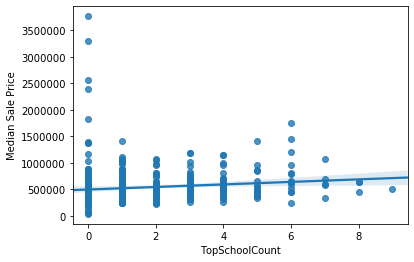

In [61]:
sns.regplot(x="TopSchoolCount", y="Median Sale Price", data=venue_details)

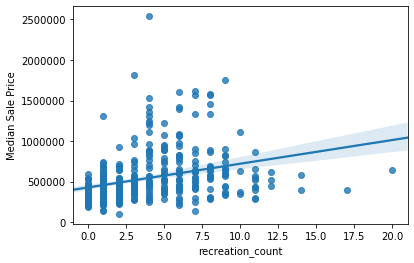

In [107]:
sns.regplot(x="recreation_count", y="Median Sale Price", data=venue_details)

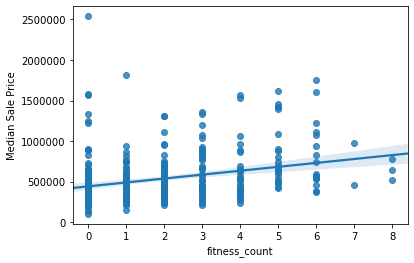

In [108]:
sns.regplot(x="fitness_count", y="Median Sale Price", data=venue_details)

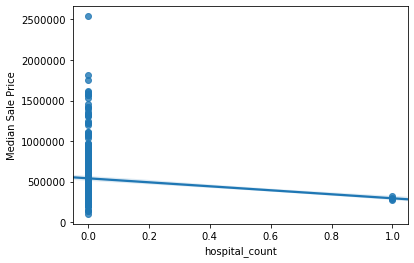

In [109]:
sns.regplot(x="hospital_count", y="Median Sale Price", data=venue_details)

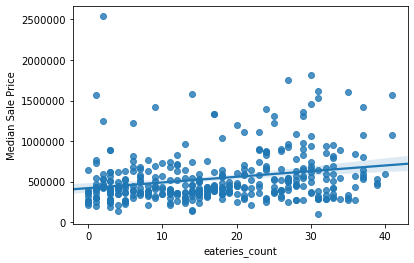

In [110]:
sns.regplot(x="eateries_count", y="Median Sale Price", data=venue_details)

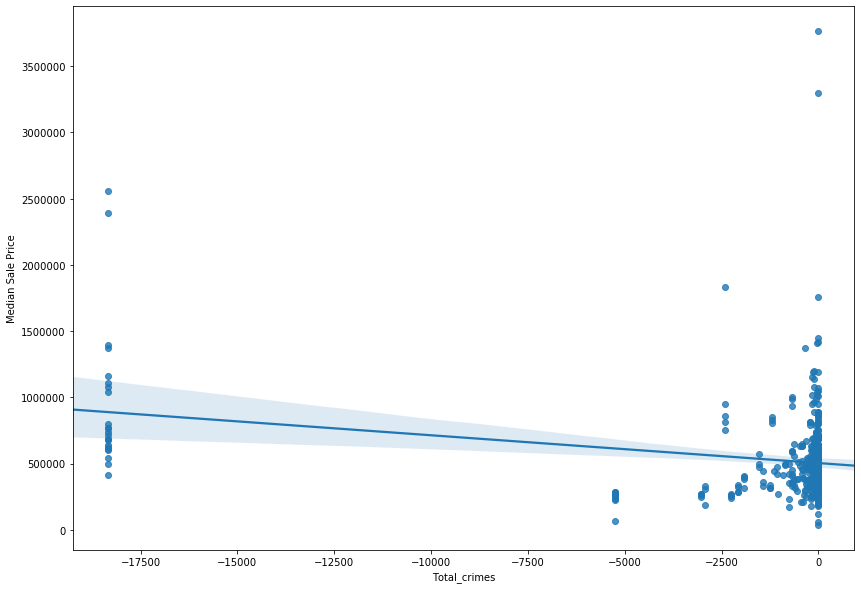

In [170]:
sns.regplot(x="Total_crimes", y="Median Sale Price", data=venue_details)

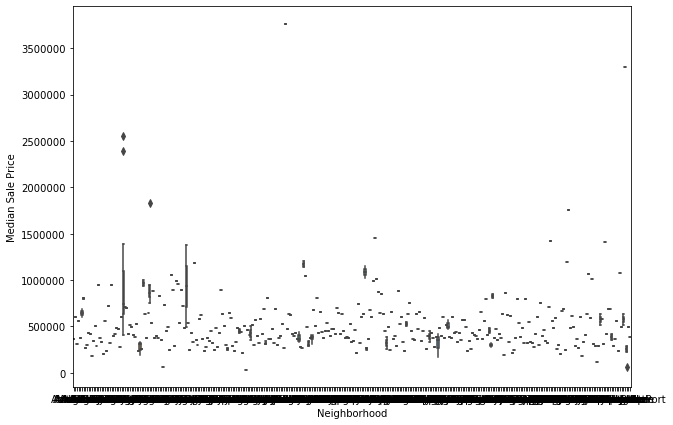

In [297]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="Neighborhood", y="Median Sale Price", data=venue_details)

In [80]:
venue_details.dtypes

Zip                   object
Neighborhood          object
recreation_count       int64
fitness_count          int64
eateries_count         int64
groceries_count        int64
Latitude             float64
Longitude            float64
Median Sale Price    float64
Walk Score           float64
Transit Score        float64
Bike Score           float64
Total_crimes         float64
TopSchoolCount       float64
Clus_km                int32
dtype: object

In [171]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
Z = venue_details[['recreation_count', 'fitness_count', 'eateries_count', 'groceries_count','Walk Score','Transit Score','Bike Score','Total_crimes','TopSchoolCount']]

In [172]:
lm.fit(Z, venue_details['Median Sale Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
lm.intercept_

347809.38233540853

In [174]:
lm.coef_

array([ 3.04545289e+04,  3.83994512e+04, -9.97158561e+02, -6.65980419e+04,
       -1.01557197e+04, -2.16053341e+02,  1.09484432e+04, -1.21073400e+01,
        1.76390801e+04])

In [175]:
Y_hat = lm.predict(Z)

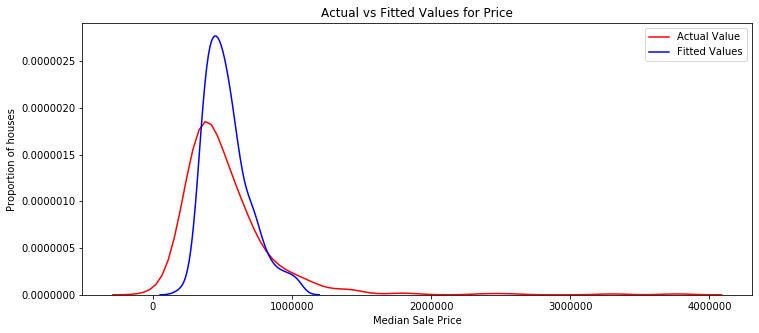

In [176]:
width = 12
height = 5

plt.figure(figsize=(width, height))


ax1 = sns.distplot(venue_details['Median Sale Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Median Sale Price')
plt.ylabel('Proportion of houses')
plt.ylim(0,)
plt.show()
plt.close()

In [98]:
conda install -c conda-forge basemap-data-hires

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - basemap-data-hires


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-data-hires-1.2.0   |                0        83.8 MB
    ------------------------------------------------------------
                                           Total:        83.8 MB

The following NEW packages will be INSTALLED:

  basemap-data-hires pkgs/main/linux-64::basemap-data-hires-1.2.0-0



basemap-data-hires-1 | 83.8 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


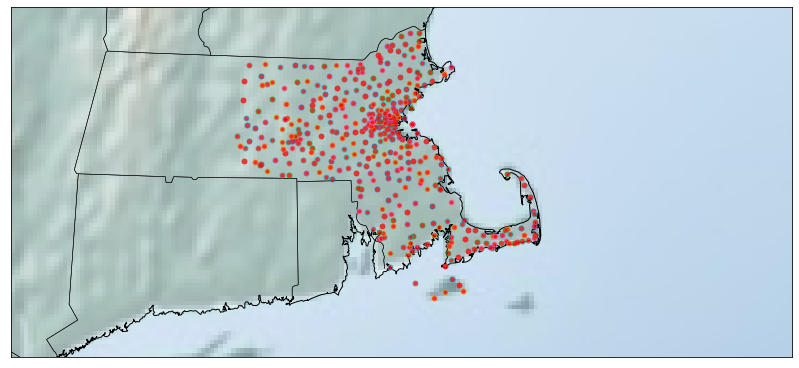

In [177]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

pdf=venue_details

llon=-74
ulon=-68
llat=41
ulat=43


pdf = pdf[(pdf['Longitude'] > llon) & (pdf['Longitude'] < ulon) & (pdf['Latitude'] > llat) &(pdf['Latitude'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'h', area_thresh = 10000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawstates()
#my_map.drawcounties()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Longitude), np.asarray(pdf.Latitude))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()



In [178]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Zip","Neighborhood","Median Sale Price","Clus_Db"]].head(15)

,Zip,Neighborhood,Median Sale Price,Clus_Db
0,02351,Abington,360000.0,3
1,01720,Acton,604000.0,0
2,02743,Acushnet,306000.0,10
3,02134,Allston,560000.0,1
4,01913,Amesbury,375000.0,-1
5,01899,Andover,683000.0,1
6,01810,Andover,597000.0,9
7,02476,Arlington,794000.0,1
8,02474,Arlington,810000.0,1
9,01430,Ashburnham,265000.0,-1


In [179]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


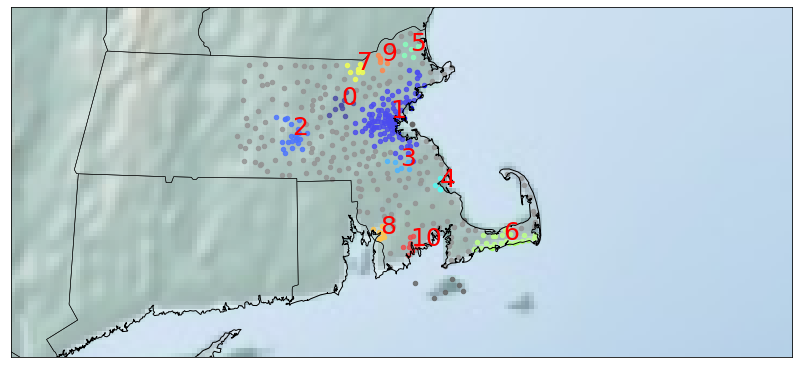

In [180]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'h', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawstates()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        #print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

In [241]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

#,'recreation_count','Transit Score'
Clus_dataSet = pdf[['xm','ym','TopSchoolCount']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=3).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf.head(15)
set(labels)


{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [242]:
pdf.to_csv('best_school_1.csv',index=False)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


Cluster 0, Cluster Color: [0.  0.  0.5 1. ], TopSchoolCount: 1.0, recreation_count: 20
Cluster 1, Cluster Color: [0.         0.         0.83868093 1.        ], TopSchoolCount: 6.0, recreation_count: 11
Cluster 2, Cluster Color: [0.         0.11176471 1.         1.        ], TopSchoolCount: 0.0, recreation_count: 17
Cluster 3, Cluster Color: [0.        0.4254902 1.        1.       ], TopSchoolCount: 3.0, recreation_count: 11
Cluster 4, Cluster Color: [0.         0.72352941 1.         1.        ], TopSchoolCount: 4.0, recreation_count: 12
Cluster 5, Cluster Color: [0.11068944 1.         0.8570525  1.        ], TopSchoolCount: 2.0, recreation_count: 10
Cluster 6, Cluster Color: [0.36369386 1.         0.60404807 1.        ], TopSchoolCount: 5.0, recreation_count: 14
Cluster 7, Cluster Color: [0.60404807 1.         0.36369386 1.        ], TopSchoolCount: 2.0, recreation_count: 5
Cluster 8, Cluster Color: [0.8570525  1.         0.11068944 1.        ], TopSchoolCount: 1.0, recreation_count: 8

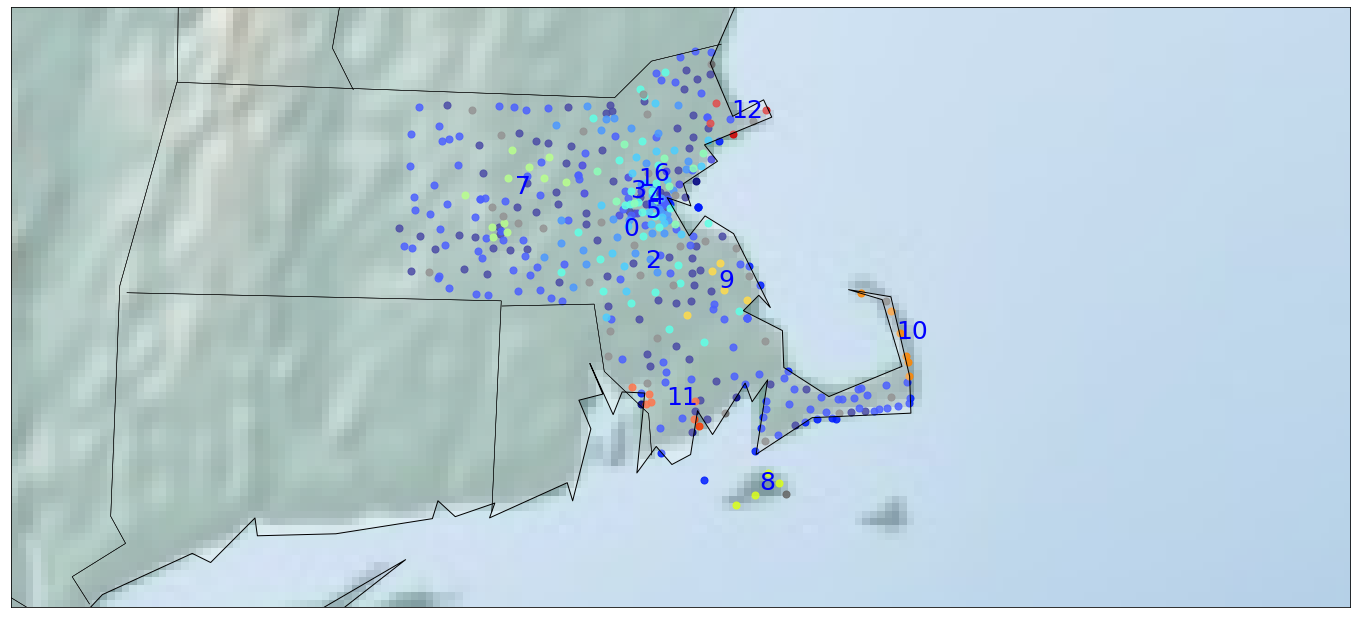

In [264]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (24,20)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawstates()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 50, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='Blue',)
        
        print ("Cluster "+str(clust_number)+', Cluster Color: '+ str(c)
               +', TopSchoolCount: '+ str(np.max(clust_set.TopSchoolCount))
              #+', Transit Score: '+ str(np.max(clust_set.Transit Score))
              +', recreation_count: '+ str(np.max(clust_set.recreation_count)))


In [277]:
venue_details3=venue_details.sort_values(by=['TopSchoolCount', 'Transit Score','recreation_count'],ascending=False).head(25)

In [278]:
venue_details3

,Zip,Neighborhood,recreation_count,fitness_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Total_crimes,TopSchoolCount,Clus_km
58,02184,Braintree,1,5,19,0,42.209555,-70.99968,510000.0,37.0,33.0,35.0,-539.0,9.0,1
41,02128,Boston,9,1,33,0,42.378297,-71.02550,638000.0,0.0,0.0,0.0,-18331.0,8.0,3
223,01760,Natick,2,4,13,0,42.290763,-71.35368,630000.0,0.0,0.0,0.0,-475.0,8.0,3
137,02038,Franklin,0,4,19,0,42.089104,-71.40690,440000.0,21.0,0.0,28.0,-90.0,8.0,1
399,01890,Winchester,6,3,41,1,42.451945,-71.14276,1075000.0,38.0,29.0,43.0,-118.0,7.0,0
14,02703,Attleboro,1,1,15,1,41.928099,-71.31456,340000.0,31.0,23.0,41.0,-627.0,7.0,6
390,02090,Westwood,4,3,24,1,42.212949,-71.20735,692000.0,0.0,0.0,0.0,-146.0,7.0,3
6,01810,Andover,2,5,30,1,42.646942,-71.15130,597000.0,0.0,0.0,0.0,-180.0,7.0,3
385,01886,Westford,1,3,15,1,42.592086,-71.43754,580000.0,0.0,0.0,0.0,-76.0,7.0,3
290,02151,Revere,6,2,32,0,42.416247,-71.00525,440000.0,62.0,54.0,46.0,-1144.0,6.0,1


In [283]:
bos_map = folium.Map(location=[42.365028, -71.05636], zoom_start=10)

In [249]:
zip_county = pd.read_csv('Mass_City_Zip_County.csv') 
zip_county.columns=["City","ZIP Code","County"]
zip_county['ZIP Code']=zip_county['ZIP Code'].apply(lambda x: '{0:0>5}'.format(x))

In [250]:
zip_county.head()

,City,ZIP Code,County
0,ABINGTON,02351,PLYMOUTH
1,ACCORD,02018,PLYMOUTH
2,ACTON,01718,MIDDLESEX
3,ACTON,01719,MIDDLESEX
4,ACTON,01720,MIDDLESEX


In [251]:
venue_details1=venue_details
venue_details1.head()


,Zip,Neighborhood,recreation_count,fitness_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Total_crimes,TopSchoolCount,Clus_km
0,02351,Abington,2,3,16,1,42.119534,-70.94787,360000.0,0.0,0.0,0.0,-188.0,1.0,1
1,01720,Acton,2,5,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,-182.0,6.0,3
2,02743,Acushnet,1,0,13,1,41.697015,-70.91019,306000.0,0.0,0.0,0.0,-88.0,1.0,6
3,02134,Allston,4,1,32,0,42.355147,-71.13164,560000.0,0.0,0.0,0.0,-0.0,0.0,3
4,01913,Amesbury,2,3,16,2,42.854423,-70.93547,375000.0,0.0,0.0,0.0,-175.0,0.0,1


In [252]:
venue_details1.head()
venue_details1.shape

(415, 15)

In [253]:
venue_details1 = pd.merge(left=venue_details1, right=zip_county, left_on='Zip', right_on='ZIP Code')

In [254]:
venue_details1['County'] = venue_details1['County'].str.title()

In [255]:
venue_details1.shape

(616, 18)

In [256]:
venue_details1=venue_details1.drop(['City'], axis=1)

In [257]:
venue_details1=venue_details1.drop(['ZIP Code'], axis=1)

In [258]:
venue_details1.shape

(616, 16)

In [260]:
venue_details1.head()

,Zip,Neighborhood,recreation_count,fitness_count,eateries_count,groceries_count,Latitude,Longitude,Median Sale Price,Walk Score,Transit Score,Bike Score,Total_crimes,TopSchoolCount,Clus_km,County
0,02351,Abington,2,3,16,1,42.119534,-70.94787,360000.0,0.0,0.0,0.0,-188.0,1.0,1,Plymouth
1,01720,Acton,2,5,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,-182.0,6.0,3,Middlesex
2,01720,Acton,2,5,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,-182.0,6.0,3,Middlesex
3,01720,Acton,2,5,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,-182.0,6.0,3,Middlesex
4,01720,Acton,2,5,22,2,42.477142,-71.44220,604000.0,0.0,0.0,0.0,-182.0,6.0,3,Middlesex


In [286]:
bos_map = folium.Map(location=[42.365028, -71.05636], zoom_start=8)

ma_geo = r'MA_County_Upd.json'
venue_details2 = venue_details1.groupby(['County'])['Median Sale Price'].mean().reset_index()
#venue_details2['Median Sale Price'] = venue_details2['Median Sale Price'].astype(float) #int
#print(venue_details2.head(8))


#df1.groupby(['State'])['Sales'].mean().reset_index()
bos_map.choropleth(
    geo_data=ma_geo,
    data=venue_details2,
    columns=['County', 'Median Sale Price'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.3,
    legend_name='Median Sale Price'
)

# display map
# as this is huge map data , we will save it to a file

bos_map

In [298]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the neighborhood and add each to the feature group
for lat, lng, in venue_details3[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [299]:
bos_map.add_child(incidents)

In [303]:
bos_map.save('conclusion.html')